<a href="https://colab.research.google.com/github/bijaykahar/Walking-Running-Prediction/blob/master/Data_Analyzing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/gdrive')
%cd /gdrive

Mounted at /gdrive
/gdrive


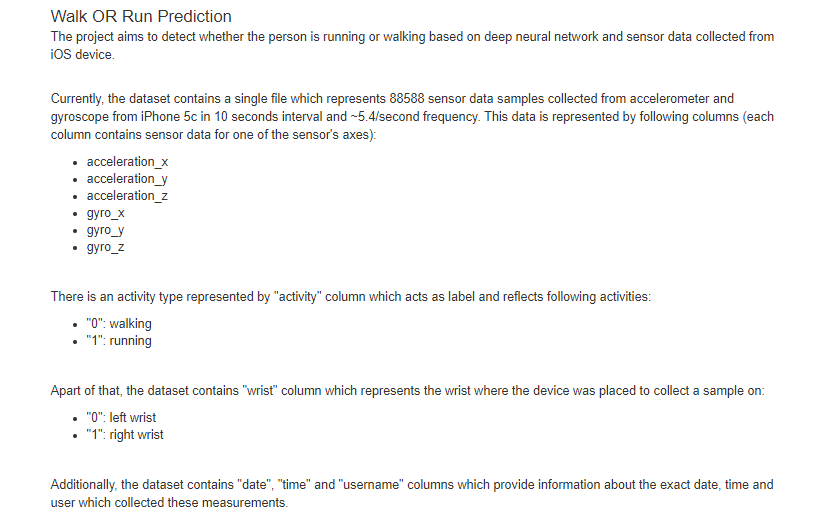

In [3]:
import numpy as np
import pandas as pd
ddata =pd.read_csv('/content/drive/My Drive/Internship_DataMites/Walking Running Classification/walkrun.csv')
ddata.head()

,date,time,username,wrist,activity,acceleration_x,acceleration_y,acceleration_z,gyro_x,gyro_y,gyro_z
0,2017-6-30,13:51:15:847724020,viktor,0,0,0.2650,-0.7814,-0.0076,-0.0590,0.0325,-2.9296
1,2017-6-30,13:51:16:246945023,viktor,0,0,0.6722,-1.1233,-0.2344,-0.1757,0.0208,0.1269
2,2017-6-30,13:51:16:446233987,viktor,0,0,0.4399,-1.4817,0.0722,-0.9105,0.1063,-2.4367
3,2017-6-30,13:51:16:646117985,viktor,0,0,0.3031,-0.8125,0.0888,0.1199,-0.4099,-2.9336
4,2017-6-30,13:51:16:846738994,viktor,0,0,0.4814,-0.9312,0.0359,0.0527,0.4379,2.4922


In [4]:
ddata.corr()

,wrist,activity,acceleration_x,acceleration_y,acceleration_z,gyro_x,gyro_y,gyro_z
wrist,1.000000,-0.113404,-0.609579,0.087091,0.323680,-0.022092,-0.068403,0.008796
activity,-0.113404,1.000000,-0.017747,0.639520,-0.192435,0.040856,0.012055,-0.008106
acceleration_x,-0.609579,-0.017747,1.000000,-0.265169,-0.552374,-0.021705,-0.004091,-0.060849
acceleration_y,0.087091,0.639520,-0.265169,1.000000,0.106220,0.010549,0.072170,-0.022994
acceleration_z,0.323680,-0.192435,-0.552374,0.106220,1.000000,0.035296,-0.021004,0.049621
gyro_x,-0.022092,0.040856,-0.021705,0.010549,0.035296,1.000000,0.094011,0.317769
gyro_y,-0.068403,0.012055,-0.004091,0.072170,-0.021004,0.094011,1.000000,0.287244
gyro_z,0.008796,-0.008106,-0.060849,-0.022994,0.049621,0.317769,0.287244,1.000000


In [5]:
ddata.shape

(88588, 11)

In [6]:
ddata.time[0]

'13:51:15:847724020'

In [7]:
ddata.date.unique()

array(['2017-6-30', '2017-7-10', '2017-7-11', '2017-7-15', '2017-7-16',
       '2017-7-17', '2017-7-1', '2017-7-2', '2017-7-4', '2017-7-6',
       '2017-7-7', '2017-7-9'], dtype=object)

In [8]:
ddata.wrist.unique()

array([0, 1])

In [9]:
ddata.username.unique()

array(['viktor'], dtype=object)

In [10]:
ddata.activity.unique()

array([0, 1])

In [1]:
from sklearn.ensemble import RandomForestClassifier

In [2]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,confusion_matrix
import matplotlib.pyplot as plt 
%matplotlib inline

In [13]:
X=ddata[['wrist','acceleration_x','gyro_z','gyro_x','gyro_y','acceleration_x','acceleration_y','acceleration_z']]
y=ddata.activity

In [14]:
X_train,X_test,Y_train,Y_test = train_test_split(X,y,test_size=0.25,random_state=10)

In [15]:
model= RandomForestClassifier(random_state=0)
model.fit(X_train,Y_train)
y_pred = model.predict(X_test)
accuracy_score(Y_test,y_pred)

0.9910597372104574

In [16]:
pd.crosstab(Y_test,y_pred)

col_0,0,1
activity,,
0,10927,113
1,85,11022


In [18]:
from sklearn.metrics import roc_curve

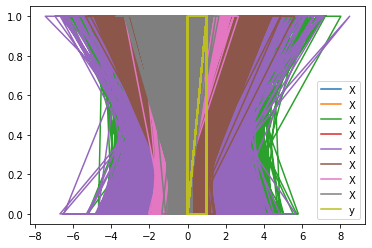

In [20]:
plt.plot(X_train,Y_train, label='X')
plt.plot(Y_test,y_pred, label='y')
plt.legend()
plt.show()
#plt.savefig('LossVal_loss')


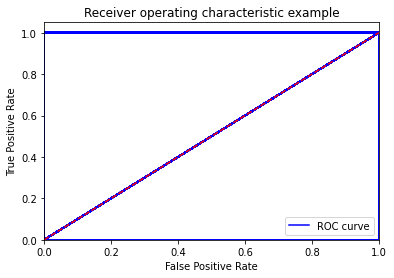

In [26]:
plt.figure()
lw = 2
plt.plot(Y_test,y_pred, color='blue', label='ROC curve' )
plt.plot([0, 1], [0, 1], color='red', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()